# 3.1 - Ingenieria de caracteristicas


**Regresion Lineal . Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import numpy as np
import pylab as plt

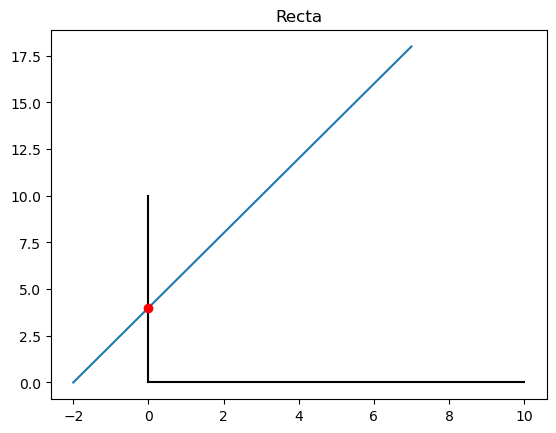

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [4]:
auto=pd.read_csv('../data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [5]:
x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()

In [6]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.82e-18
Time:                        09:19:05   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

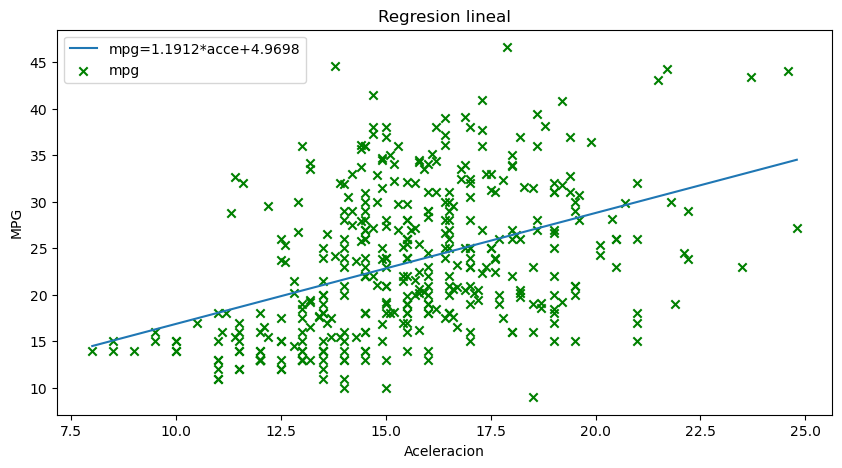

In [7]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=1.1912*x + 4.9698

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='mpg={}*acce+{}'.format(1.1912, 4.9698))

# datos
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [29]:
# varias variables

x=sm.add_constant(auto[[
    
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          3.33e-140
Time:                        09:42:26   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**los coeficientes, son los pesos de las caracteristicas**

In [16]:
from sklearn.linear_model import LinearRegression as LinReg

In [17]:
auto=auto.dropna()

X=auto.drop('mpg', axis=1)._get_numeric_data()

y=auto.mpg

In [18]:
modelo=LinReg()

modelo.fit(X, y)

LinearRegression()

In [19]:
modelo.intercept_   # beta0, ordenada en el origen

-14.535250480506011

In [21]:
dict(zip(X.columns, modelo.coef_))

{'cylinders': -0.3298590890739669,
 'displacement': 0.007678430243919033,
 'horse_power': -0.00039135557376072743,
 'weight': -0.0067946179133750355,
 'acceleration': 0.08527324694722943,
 'model_year': 0.7533671797501014}

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)

In [25]:
dict(zip(X.columns, linreg.coef_))

{'cylinders': -0.561949960954404,
 'displacement': 0.8024761554073669,
 'horse_power': -0.015044503769495102,
 'weight': -5.763999713309912,
 'acceleration': 0.2349570366233137,
 'model_year': 2.771664146525285}

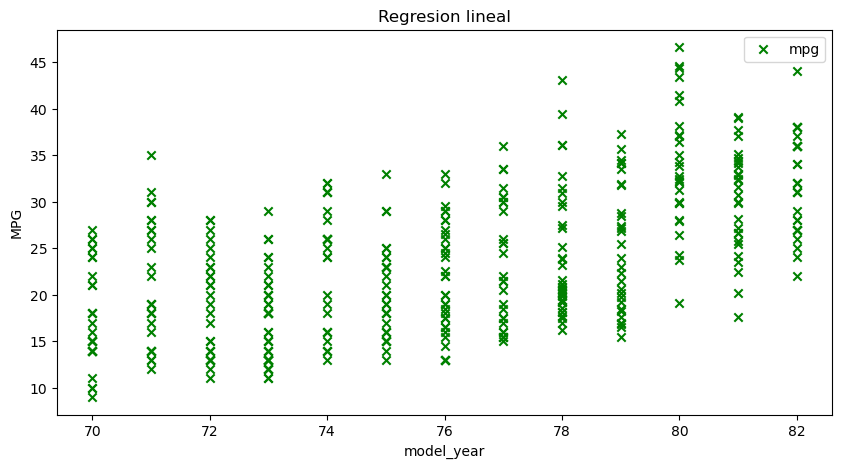

In [26]:
# plot

x=np.linspace(auto.model_year.min(), auto.model_year.max(), 50)

plt.figure(figsize=(10, 5))


# datos
plt.scatter(auto.model_year, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('model_year')
plt.ylabel('MPG')
plt.legend()
plt.show();

## Regresion Logistica


$$y=\frac{1}{1 + e^{-(\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n)}}$$

El objetivo de la regresion logistica es obtener los $\beta$.

In [30]:
iris=pd.read_csv('../data/iris.csv')

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [31]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [32]:
dictio = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

iris.variety=iris.variety.apply(lambda x: dictio[x])

iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
X = iris.drop('variety', axis=1)

y = iris.variety

In [34]:
from sklearn.linear_model import LogisticRegression as LogReg

In [35]:
logreg=LogReg().fit(X, y)

In [36]:
logreg.intercept_

array([  9.8393878 ,   2.21494388, -12.05433168])

In [40]:
dict(zip(X.columns, logreg.coef_.T))

{'sepal.length': array([-0.41824913,  0.5310752 , -0.11282607]),
 'sepal.width': array([ 0.96651916, -0.3145156 , -0.65200356]),
 'petal.length': array([-2.52137228, -0.19936908,  2.72074136]),
 'petal.width': array([-1.08404515, -0.94913332,  2.03317847])}

In [41]:
X_norm=StandardScaler().fit_transform(X)

logreg=LogReg().fit(X_norm, y)

In [42]:
logreg.intercept_

array([-0.20531681,  2.07486525, -1.86954844])

In [43]:
{'Setosa': dict(zip(X.columns, logreg.coef_[0])),
 
'Versicolor': dict(zip(X.columns, logreg.coef_[1])),
 
'Virginica': dict(zip(X.columns, logreg.coef_[2]))}


{'Setosa': {'sepal.length': -1.0740414858360154,
  'sepal.width': 1.1600634216479495,
  'petal.length': -1.9306286585787182,
  'petal.width': -1.8116887259627756},
 'Versicolor': {'sepal.length': 0.5878005069939082,
  'sepal.width': -0.36182376888101353,
  'petal.length': -0.3634627420857541,
  'petal.width': -0.8261928890080613},
 'Virginica': {'sepal.length': 0.48624097884210704,
  'sepal.width': -0.7982396527669362,
  'petal.length': 2.2940914006644726,
  'petal.width': 2.6378816149708366}}

## Decision Tree - Random Forest

In [44]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [45]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [46]:
# dtr

X=auto.drop(columns=['mpg', 'car_name'])

y=auto.mpg

In [47]:
dtr = DTR().fit(X, y)

In [51]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.37112016655496105,
 'displacement': 60.21347580770724,
 'horse_power': 17.335143819146822,
 'weight': 8.035912729116554,
 'acceleration': 2.9566888745813276,
 'model_year': 11.087658602893095}

In [74]:
X_norm=StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.060793920694468054,
 'displacement': 59.94657593123978,
 'horse_power': 17.374301045310368,
 'weight': 8.483389056274795,
 'acceleration': 2.954136989531703,
 'model_year': 11.180803056948886}

In [82]:
rfr = RFR(n_estimators=2000).fit(X_norm, y)

In [83]:
dict(zip(X.columns, rfr.feature_importances_*100))   # de media

{'cylinders': 17.226849504387552,
 'displacement': 34.51654213406785,
 'horse_power': 12.723440477165745,
 'weight': 20.438884118862248,
 'acceleration': 3.0081160913248874,
 'model_year': 12.086167674191719}

In [77]:
sum(rfr.feature_importances_)

1.0

In [80]:
rfr.estimators_[0].feature_importances_

array([0.0009921 , 0.55144667, 0.01528054, 0.2243453 , 0.03392488,
       0.17401051])

In [81]:
[tree.feature_importances_ for tree in rfr.estimators_][:3]

[array([0.0009921 , 0.55144667, 0.01528054, 0.2243453 , 0.03392488,
        0.17401051]),
 array([0.00226513, 0.62014011, 0.20871935, 0.04956168, 0.03759645,
        0.08171728]),
 array([0.00478082, 0.607721  , 0.16042142, 0.08681814, 0.0279461 ,
        0.11231253])]

In [92]:
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse

In [89]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8)

In [90]:
X_train=StandardScaler().fit_transform(X_train)

X_test=StandardScaler().fit_transform(X_test)


In [95]:
y_test.mean(), y_test.std()

(22.635443037974685, 7.669687888121714)

In [94]:
# dtr

dtr = DTR().fit(X_train, y_train)

y_pred = dtr.predict(X_test)

mse(y_test, y_pred, squared=False)

3.443890205397879

In [96]:
dtr.score(X_test, y_test)

0.7957906132789927

In [97]:
# rfr

rfr = RFR(n_estimators=2000).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

2.805054511197765

In [98]:
rfr.score(X_test, y_test)

0.8645248260437579

In [102]:
X['random'] = np.random.normal(size=len(X))

X.head()

,cylinders,displacement,horse_power,weight,acceleration,model_year,random
0,8,307.0,130.0,3504,12.0,70,1.197569
1,8,350.0,165.0,3693,11.5,70,1.274206
2,8,318.0,150.0,3436,11.0,70,0.521276
3,8,304.0,150.0,3433,12.0,70,0.243902
4,8,302.0,140.0,3449,10.5,70,-1.711103


In [103]:
X_norm=StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

{'cylinders': 0.026137004641164745,
 'displacement': 60.29193357624779,
 'horse_power': 17.00022215772447,
 'weight': 7.676662302010802,
 'acceleration': 2.290878991601161,
 'model_year': 10.980925340405573,
 'random': 1.7332406273690326}

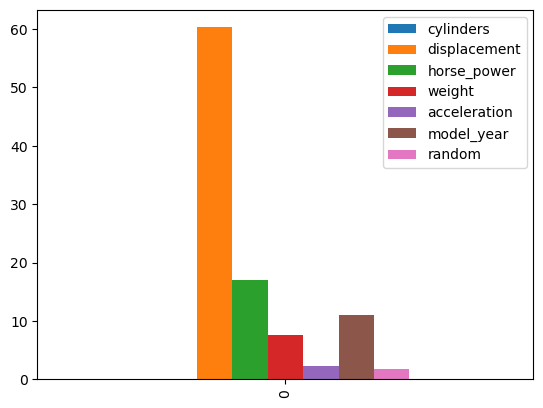

In [106]:
pd.DataFrame(dict(zip(X.columns, dtr.feature_importances_*100)), index=[0]).plot(kind='bar');